In [1]:
import numpy as np
from basicpy import BaSiC
from scipy.ndimage import zoom
import zarr
from numcodecs import GZip 

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def transform(images, f, d=None):
    if d is not None:
        images_transformed = (np.clip(images-d[np.newaxis],0,None))/f[np.newaxis]
    else:
        images_transformed = images/f[np.newaxis]
        
    return images_transformed

In [3]:
path = "/u/scratch/f/f7xiesnm/sparse06/dataset.n5"
outpath = "/u/home/f/f7xiesnm/project-zipursky/data/hold/sparse06/r1_test_flatfield_v6.n5"
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')

In [4]:
print(zarr_data[f'/setup0/timepoint0/s0'].shape)
print(zarr_data[f'/setup0/timepoint0/s1'].shape)
print(zarr_data[f'/setup0/timepoint0/s2'].shape)
print(zarr_data[f'/setup0/timepoint0/s3'].shape)
print(zarr_data[f'/setup0/timepoint0/s4'].shape)

(2837, 1920, 1920)
(2837, 960, 960)
(1418, 480, 480)
(709, 240, 240)
(354, 120, 120)


In [5]:
images_raw = np.vstack([
#     zarr_data[f'/setup1/timepoint0/s4'][...],
#     zarr_data[f'/setup2/timepoint0/s4'][...],
#     zarr_data[f'/setup3/timepoint0/s4'][...],
    
#     zarr_data[f'/setup6/timepoint0/s4'][...],
#     zarr_data[f'/setup7/timepoint0/s4'][...],
#     zarr_data[f'/setup8/timepoint0/s4'][...],
    
    zarr_data[f'/setup11/timepoint0/s3'][...],
    zarr_data[f'/setup12/timepoint0/s3'][...],
    zarr_data[f'/setup13/timepoint0/s3'][...],
    
    # zarr_data[f'/setup16/timepoint0/s4'][...],
    # zarr_data[f'/setup17/timepoint0/s4'][...],
    # zarr_data[f'/setup18/timepoint0/s4'][...],
])
images_raw.shape

(2127, 240, 240)

In [6]:
# import tifffile
# outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
# !mkdir -p $outdir

# print(np.max(images), np.min(images))
# tifffile.imwrite(outdir+'/c0_s4.tiff', images)

# print(np.max(images_dapi), np.min(images_dapi))
# tifffile.imwrite(outdir+'/c3_s4.tiff', images_dapi)

In [7]:
pctls = [1, 50, 80, 90, 95, 99]
vects = []
for pctl in pctls:
    vec = np.percentile(images_raw, pctl, axis=0)
    vects.append(vec)

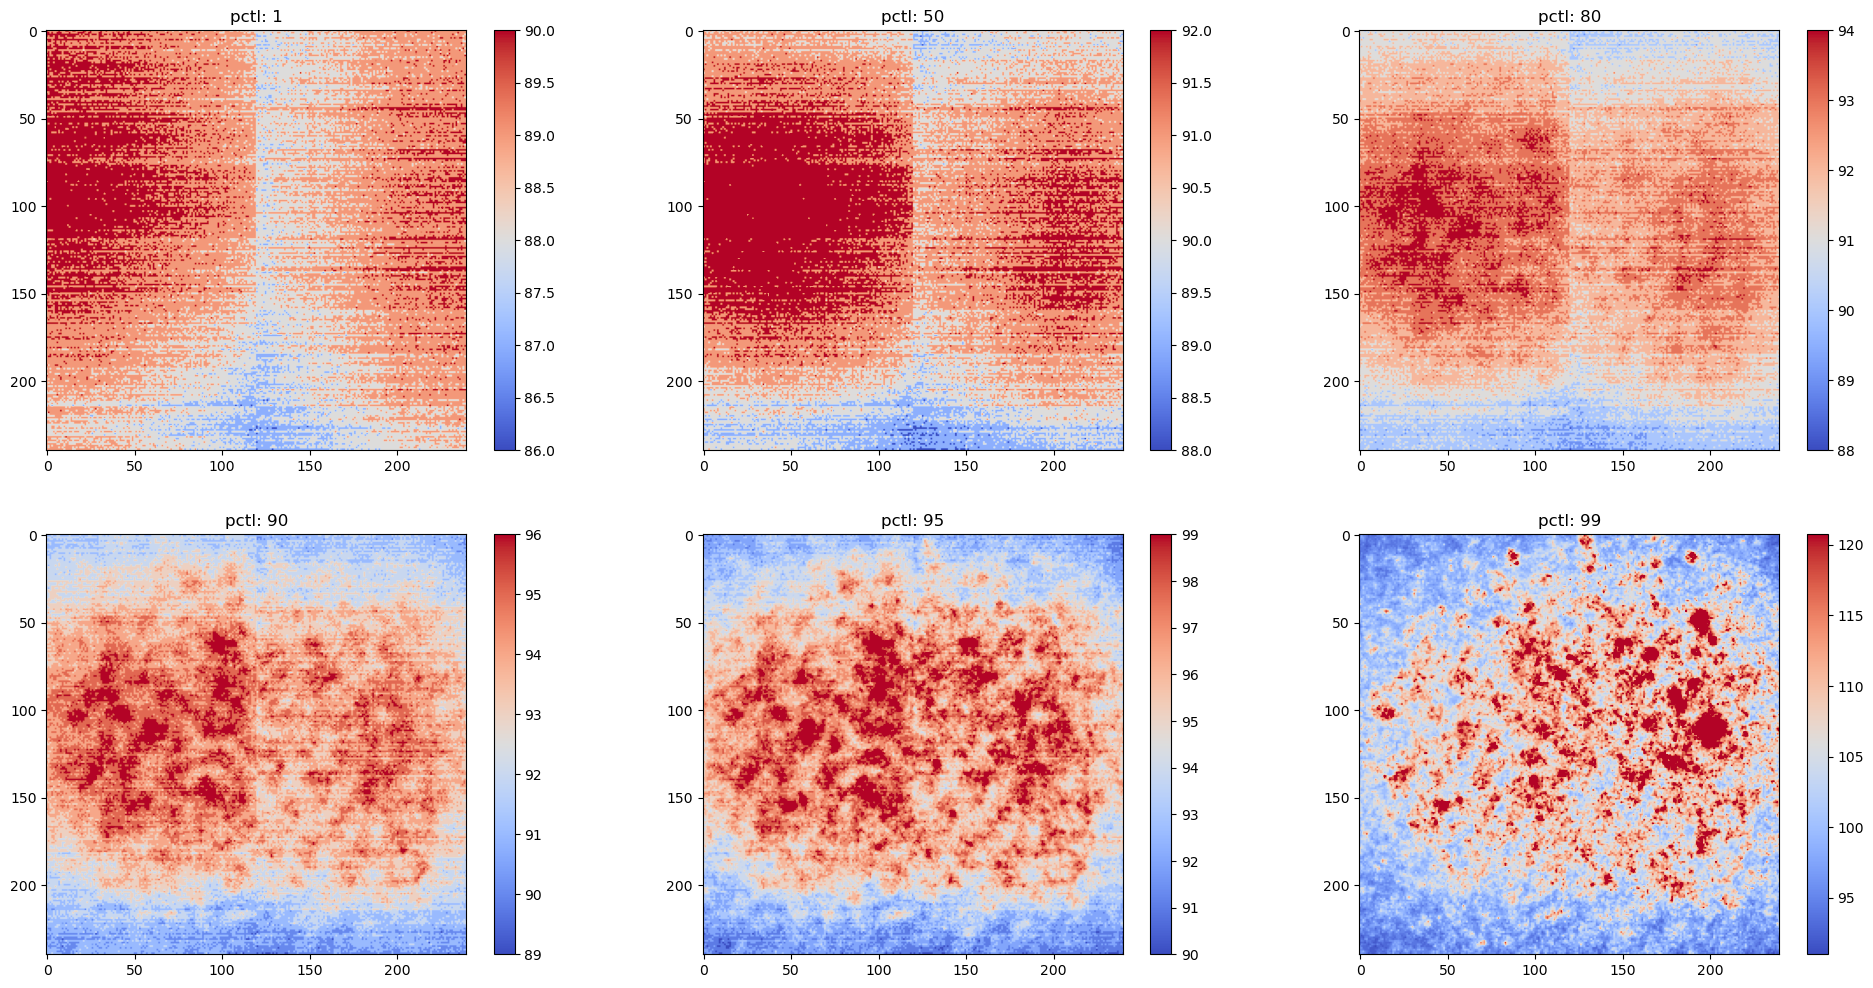

In [8]:
fig, axs = plt.subplots(2,3, figsize=(3*8,2*6))
for ax, pctl, vec in zip(axs.flat, pctls, vects): 
    vmax = np.percentile(vec, 95)
    vmin = np.percentile(vec,  5)
    g = ax.imshow(vec, cmap='coolwarm', vmax=vmax)
    ax.set_title(f'pctl: {pctl}')
    fig.colorbar(g)

plt.show()

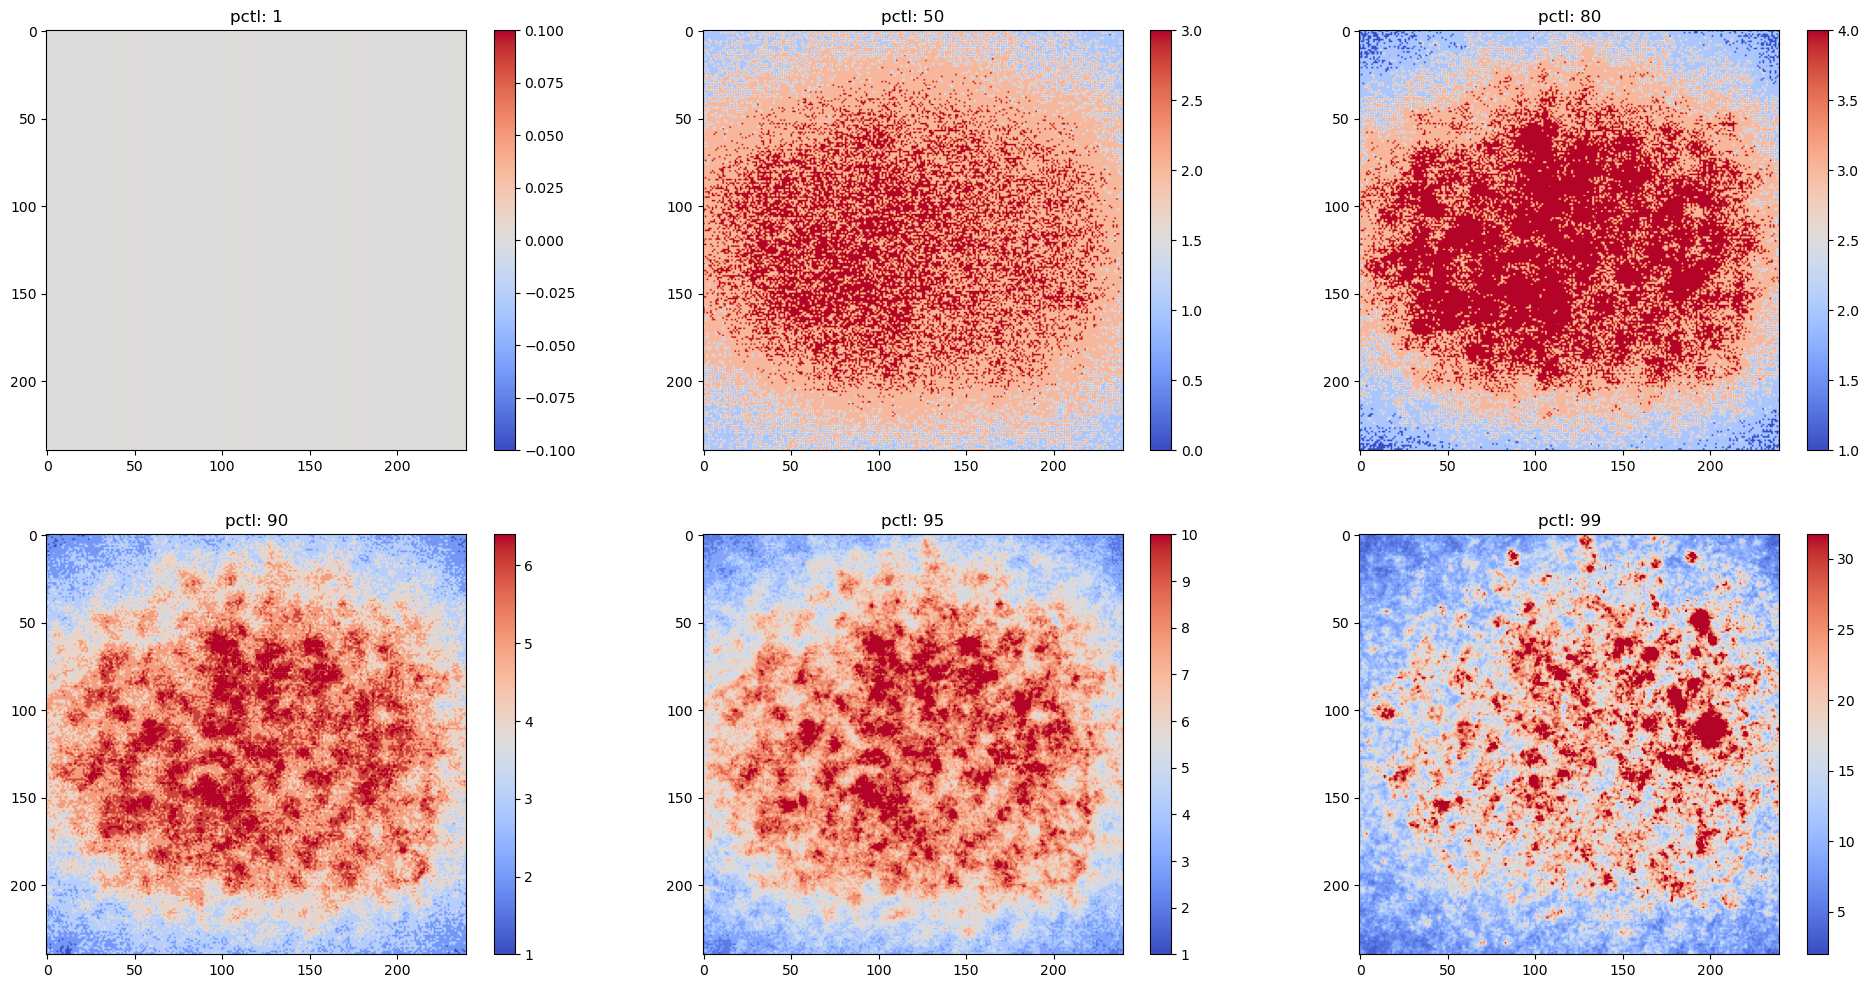

In [9]:
fig, axs = plt.subplots(2,3, figsize=(3*8,2*6))
for ax, pctl, vec in zip(axs.flat, pctls, vects): 
    vec = vec - vects[0]
    vmax = np.percentile(vec, 95)
    vmin = np.percentile(vec,  5)
    g = ax.imshow(vec, cmap='coolwarm', vmax=vmax)
    ax.set_title(f'pctl: {pctl}')
    fig.colorbar(g)
plt.show()

In [10]:
# correct it

In [11]:
# images = zarr_data[f'/setup13/timepoint0/s4'][...]
images = images_raw.copy()
dx = np.percentile(images,1, axis=0)
images = np.clip(images.astype(np.float16) - dx, 0, 1000).astype(np.uint16)

In [12]:
%%time
np.random.seed(0)

n = 100
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images[idx])

CPU times: user 49.4 s, sys: 1.21 s, total: 50.6 s
Wall time: 22.3 s


In [13]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

(0.38138178, 1.1971583)

In [14]:
df  = basic.darkfield
np.min(df), np.max(df)

(0.0, 0.0)

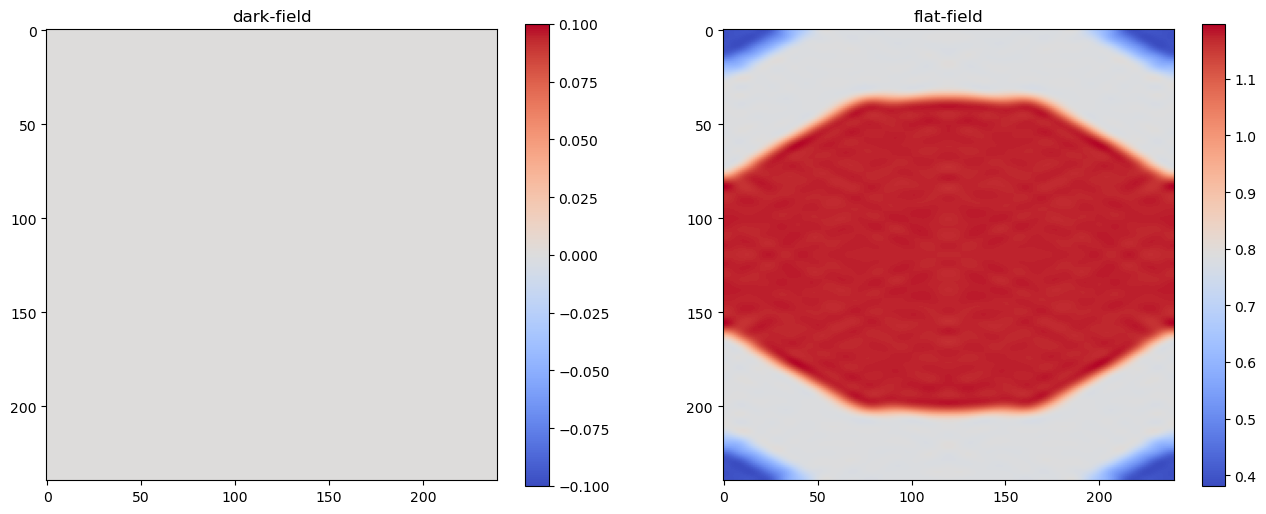

In [15]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [16]:
%%time
np.random.seed(0)

n = 200
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images[idx])

CPU times: user 3min 58s, sys: 7.66 s, total: 4min 5s
Wall time: 1min 34s


In [17]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

(0.38644832, 1.2275815)

In [18]:
df  = basic.darkfield
np.min(df), np.max(df)

(0.0, 0.0)

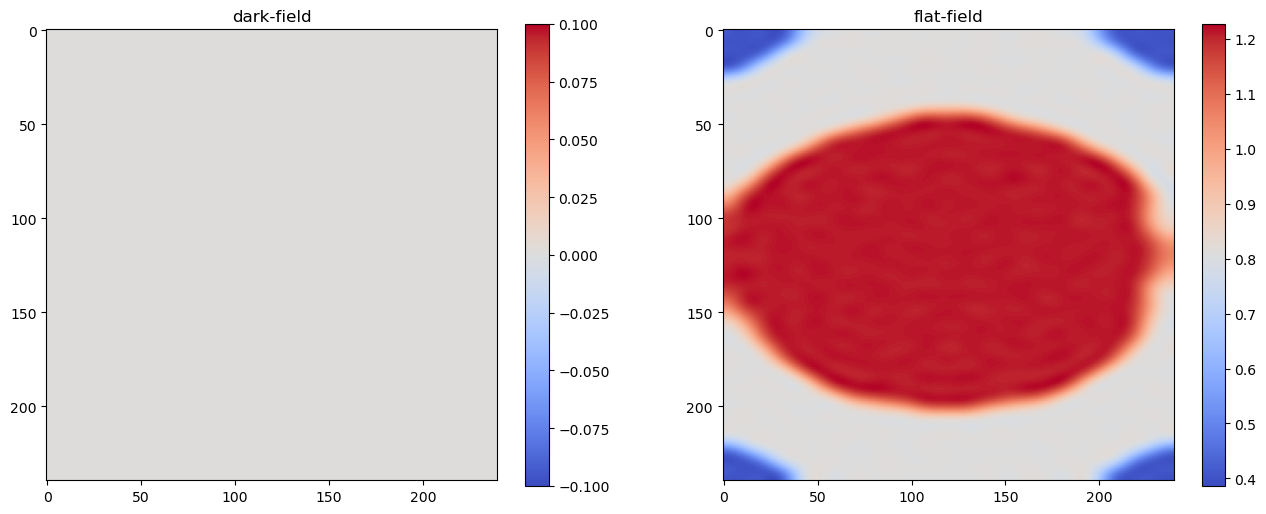

In [19]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [20]:
%%time
np.random.seed(0)

n = 400
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images[idx])

CPU times: user 12min 36s, sys: 34.3 s, total: 13min 10s
Wall time: 4min 50s


In [21]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

(0.3855941, 1.234111)

In [22]:
df  = basic.darkfield
np.min(df), np.max(df)

(0.0, 0.0)

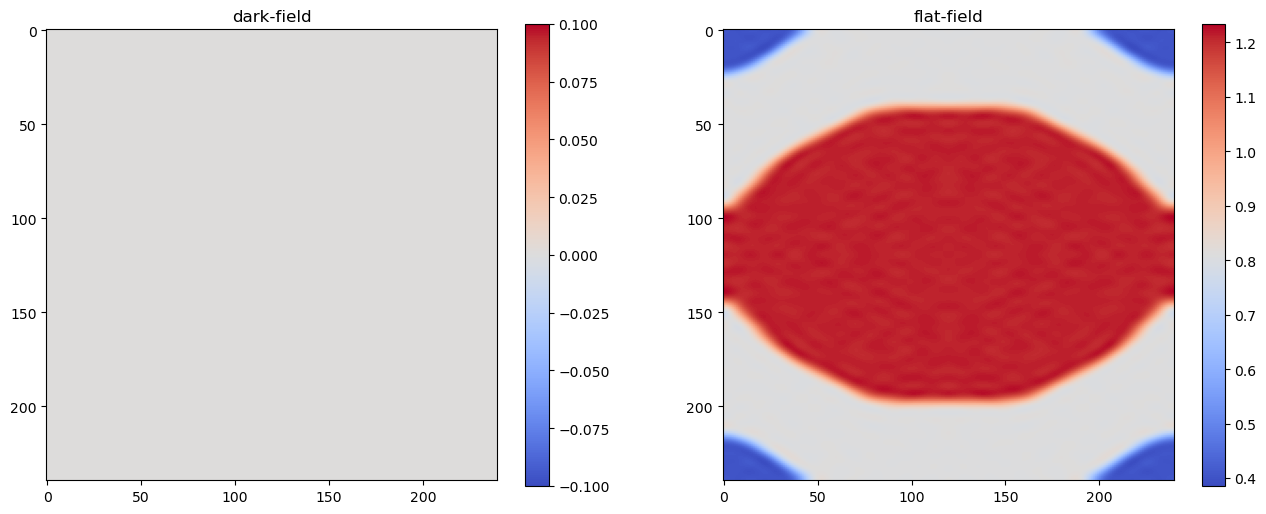

In [23]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 800
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 1600
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

# n = 1600
# idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None)
basic.fit(images) # [idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(dx, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
# import tifffile
# outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/sparse06_r1c0_flatfield'
# !mkdir -p $outdir

# tifffile.imwrite(outdir+'/darkfield.tiff', dx)
# tifffile.imwrite(outdir+'/flatfield.tiff', ff)

In [ ]:
# !ls $outdir
# dx = tifffile.imread(outdir+'/darkfield.tiff')
# ff = tifffile.imread(outdir+'/flatfield.tiff')
# dx, ff

# save ff and dx (1 percentile)
- save this and use it later!!!

In [ ]:
ff.shape

In [ ]:
dx.shape

In [ ]:
images_s1  = zarr_data[f'/setup13/timepoint0/s1'][...]
attributes = zarr_data[f'/setup13/timepoint0/s1'].attrs.asdict()
attributes['pixelResolution'] = [0.23, 0.23, 0.42] # useful later
attributes

In [ ]:
np.min(ff_s1)

In [ ]:
ff_s1 = zoom(basic.flatfield, 8)
dx_s1 = zoom(dx, 8)
# images_transformed    = transform(images   , basic.flatfield).astype(np.uint16)
images_transformed_s1 = transform(images_s1.astype(np.float16), ff_s1, d=dx_s1).astype(np.uint16)

In [ ]:
# a0 = cnst + images_s1.astype(np.uint16)
# a  = cnst + images_transformed_s1.astype(np.uint16)
a  = images_transformed_s1.astype(np.uint16)
# a

In [ ]:
n5_root = zarr.open_group(store=zarr.N5Store(outpath), mode='w')

In [ ]:
dataset = n5_root.require_dataset(
    'c0/s1',
    shape=a.shape,
    chunks=(64, 128, 128),
    dtype=a.dtype,
    compressor=GZip(level=1),
    data=a)
# set additional attributes
dataset.attrs.update(**attributes)

In [ ]:
n5_root['c0/s1']

In [ ]:
!ls $outpath
!cat $outpath/attributes.json
!cat $outpath/c0/s1/attributes.json

In [ ]:
img1 = n5_root['c0/s1'][...]
img2 = n5_root['c00/s1'][...]

In [ ]:
img1.shape, img2.shape

In [ ]:
import tifffile

outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
!mkdir -p $outdir

print(np.max(img1), np.min(img1))
tifffile.imwrite(outdir+'/c0_s1.tiff', img1)

outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
print(np.max(img2), np.min(img2))
tifffile.imwrite(outdir+'/c00_s1.tiff', img2)

In [ ]:
# get adata attributes correct

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

In [ ]:
i = 100

vmin = np.percentile(images_transformed_s1[i], 5)
vmax = np.percentile(images_transformed_s1[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images_s1[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed_s1[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")
fig.tight_layout()

In [ ]:
i = 100

vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")
fig.tight_layout()

In [ ]:
i = 50

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=0)) #, vmin=90, vmax=94)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=0)) # , vmin=90, vmax=94) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=0)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

In [ ]:

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=1)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=1)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=2)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=2)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

In [ ]:
i = 50

vmin = np.percentile(images_transformed_s1, 5)
vmax = np.percentile(images_transformed_s1, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=0)) #, vmin=90, vmax=94)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=0)) # , vmin=90, vmax=94) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=0)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

In [ ]:

vmin = np.percentile(images_transformed_s1, 5)
vmax = np.percentile(images_transformed_s1, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=1)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=1)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=2)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=2)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()